<a href="https://colab.research.google.com/github/Rionge/Streamlit-demo/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')

Explolatory Data Analysis

In [ ]:
wine.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine['alcohol'] = wine['alcohol'].astype(int)
print(wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                   int64
quality                   int64
dtype: object


In [ ]:
wine.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

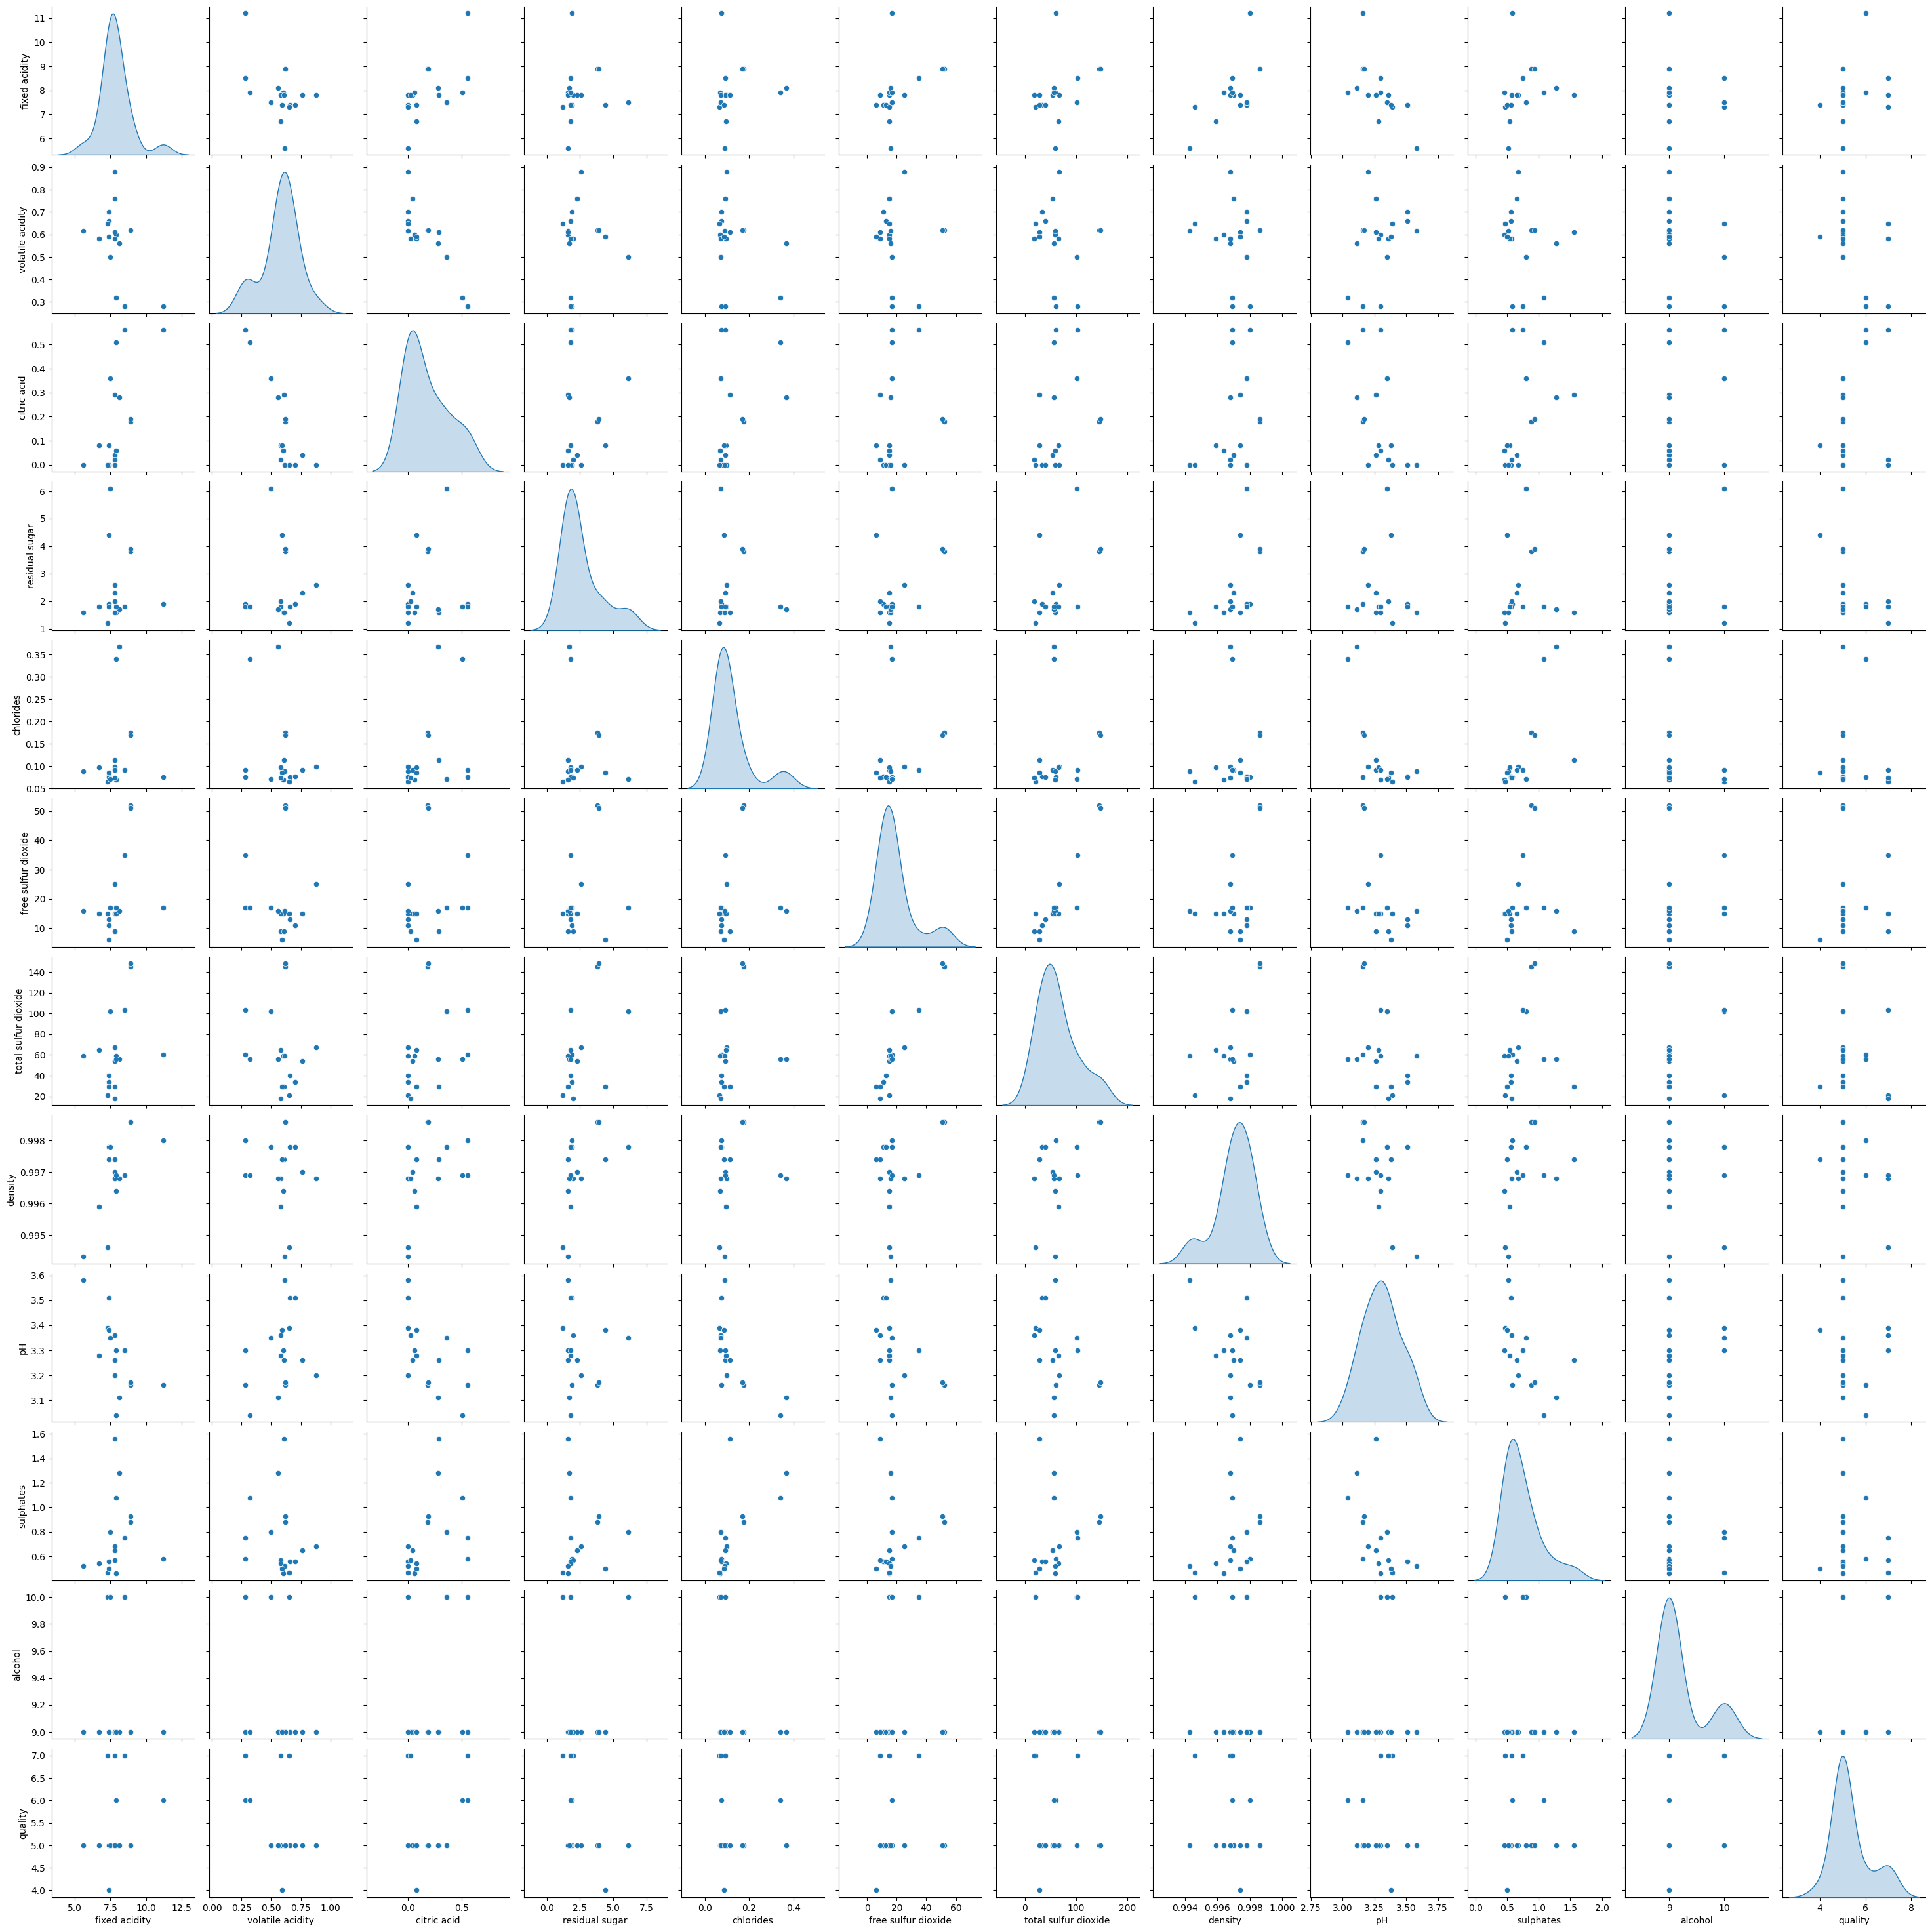

In [ ]:
# wine.hist(bins = 20, figsize(10,10))
# plt.show
sns.pairplot(data=wine,diag_kind='kde')

<Axes: xlabel='quality', ylabel='alcohol'>

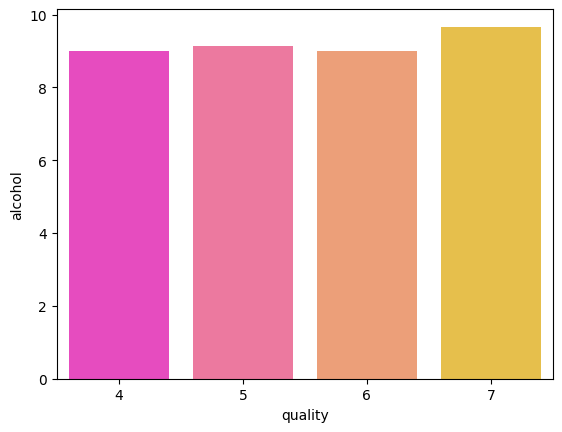

In [ ]:
df = wine.iloc[0: 20]
sns.barplot(x='quality', y='alcohol', data=df, errorbar=None, palette='spring', lw=3,)

<Axes: >

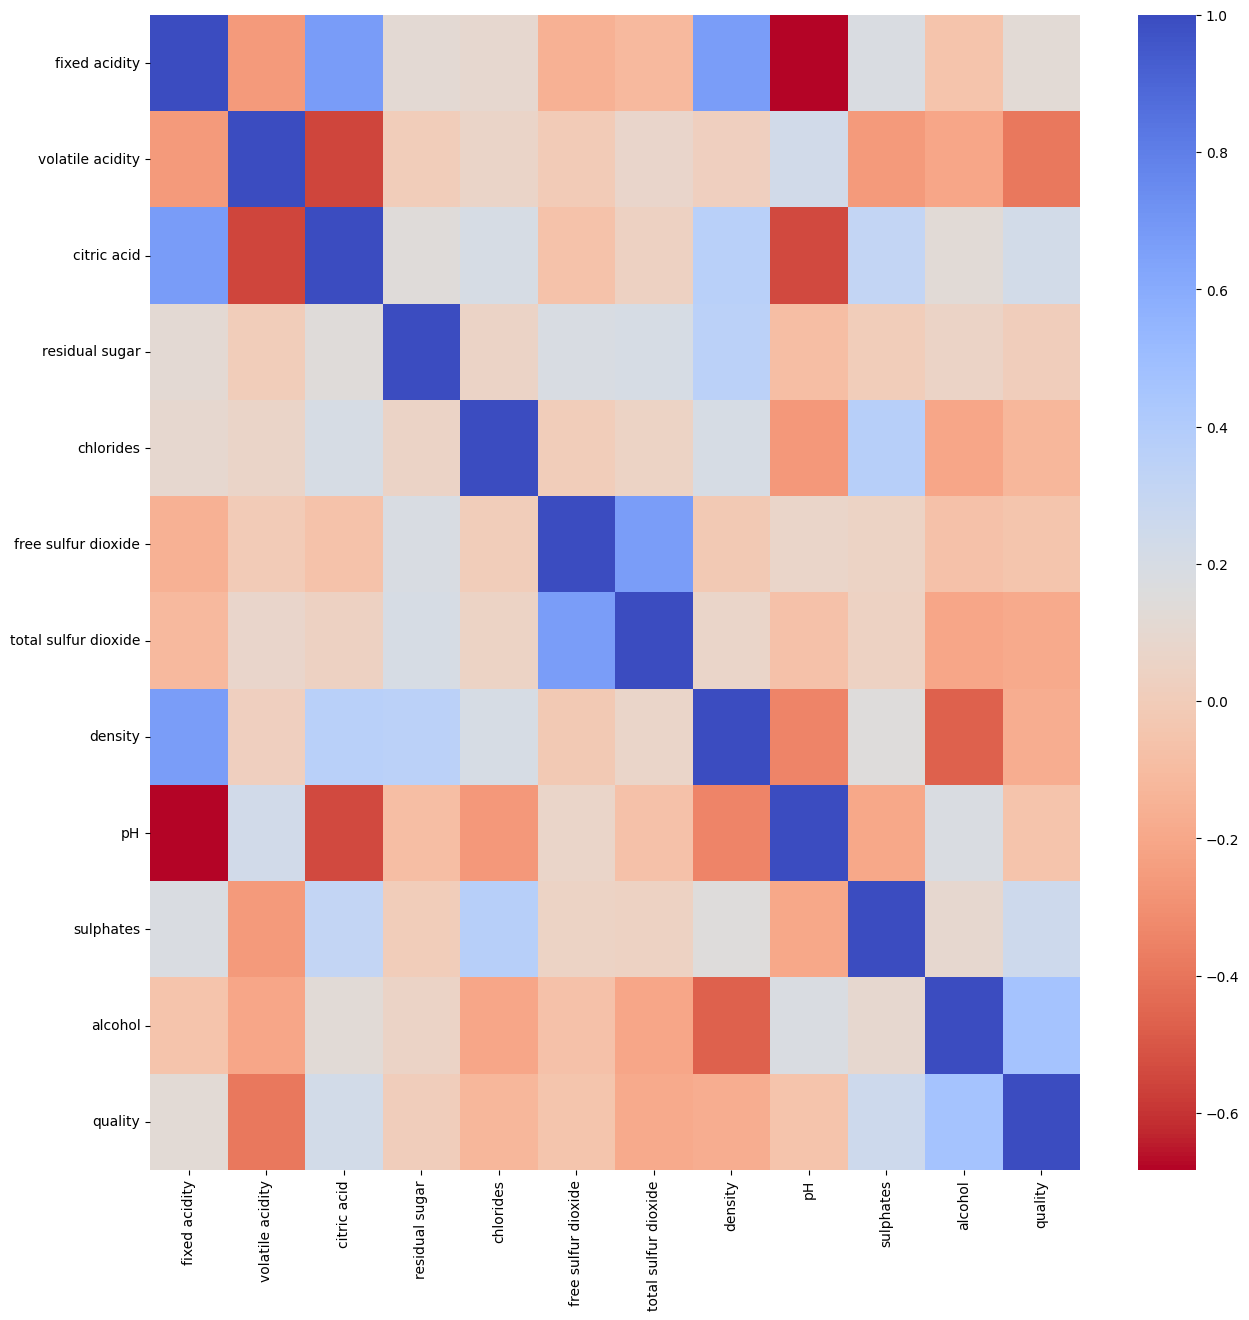

In [ ]:
corr = wine.corr()['quality'].drop('quality')
plt.figure(figsize = (15,15))
sns.heatmap(wine.corr(), cmap='coolwarm_r', annot_kws={'size':20})

Modeling Data

In [ ]:
def get_features(corr_threshold):
  abs_corrs = corr.abs()
  high_corrs = abs_corrs[abs_corrs >corr_threshold].index.values.tolist()
  return high_corrs 

In [ ]:
features = get_features(0.05)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
X =wine[features]
y =wine['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
X_train.shape, X_test.shape

((1279, 10), (320, 10))

In [ ]:
y_test

407     7
1220    6
1200    6
308     6
1328    5
       ..
724     4
188     5
1374    3
788     6
770     6
Name: quality, Length: 320, dtype: int64

In [ ]:
norm = StandardScaler()
X_train = norm.fit_transform(X_train)
X_test  = norm.transform(X_test)

In [ ]:
lr = LogisticRegression(random_state = 0, max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_hat = lr.predict(X_test)
y_hat

array([6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 7, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6, 6, 5, 7, 6, 5, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 7, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 6, 5, 5, 6, 6, 7, 6, 6, 7,
       5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 7, 5,
       5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 7, 7, 6, 5, 5, 6, 5, 7, 5, 5, 5, 6,

In [ ]:
# print('the accuracy of LogisticRegresion is: ', metrics.accuracy_score(y_hat, y_test())
np.sqrt(mean_squared_error(y_test, y_hat))

0.7115124735378854

Model Evaluation

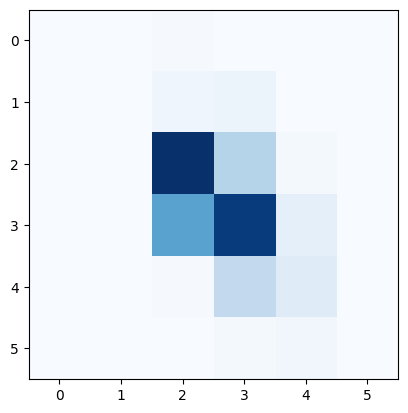

In [ ]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap = plt.cm.Blues)
plt.show()

In [ ]:
#example new sample
new_sample = [11.1, 10.27, 6.6, 1.9, 27.045, 7.0, 75.0, 3.23, 6.64, 14.5]

#preprocess new data using the same scaler used for training
normalised_data = norm.transform([new_sample])

#use XGBClassifier to make prediction
prediction = lr.predict(normalised_data)

print(prediction)#print the predicted class: 0 or 1

[3]


In [ ]:
if prediction[0] == 0:
  print('The model predicts that the new sample is of low quality.')
else:
  print('The model predicts that the new sample is of high quality.')


The model predicts that the new sample is of high quality.


In [ ]:
import pickle
pickle.dump(lr, open('projo_0.sav', 'wb'))